In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from zipfile import ZipFile
import os

# Initialize logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')
logger = logging.getLogger(__name__)



#### Define Functions for Loading Data

In [3]:
def load_data_from_zip(zip_path, file_name):
    with ZipFile(zip_path) as z:
        with z.open(file_name) as f:
            return pd.read_csv(f)

In [4]:
zip_file_path = '../data/rossmann-store-sales.zip'
train_data = load_data_from_zip(zip_file_path, 'train.csv')
test_data = load_data_from_zip(zip_file_path, 'test.csv')
store_data = load_data_from_zip(zip_file_path, 'store.csv')

/tmp/ipykernel_1832/394395991.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f)


#### Inspect data

#### Display the first few rows of each dataset

In [ ]:
print(train_data.head())
print(test_data.head())
print(store_data.head())

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2

In [6]:
print(train_data.info())
print(test_data.info())
print(store_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date

In [7]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())
print(store_data.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [8]:
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace=True)


/tmp/ipykernel_1832/161140684.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace=True)


In [9]:
merged_data = pd.merge(train_data, store_data, on='Store', how='left')
print(merged_data.head())


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                   

#### Distribution of Promos in Train vs Test Set

2025-01-03 22:26:00,810 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 22:26:01,510 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 22:26:01,793 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 22:26:01,830 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


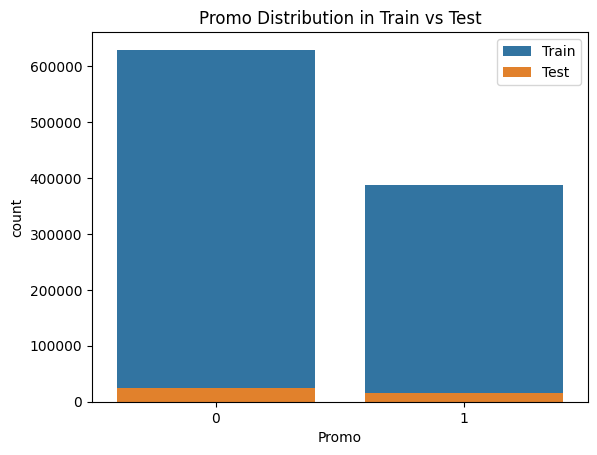

In [10]:
sns.countplot(x='Promo', data=train_data, label='Train')
sns.countplot(x='Promo', data=test_data, label='Test')
plt.title('Promo Distribution in Train vs Test')
plt.legend()
plt.show()

#### Sales Behavior Before, During, and After Holidays

In [11]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data['Holiday'] = merged_data['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)


#### Plot sales behavior before, during, and after holidays

2025-01-03 22:26:18,142 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 22:26:18,150 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


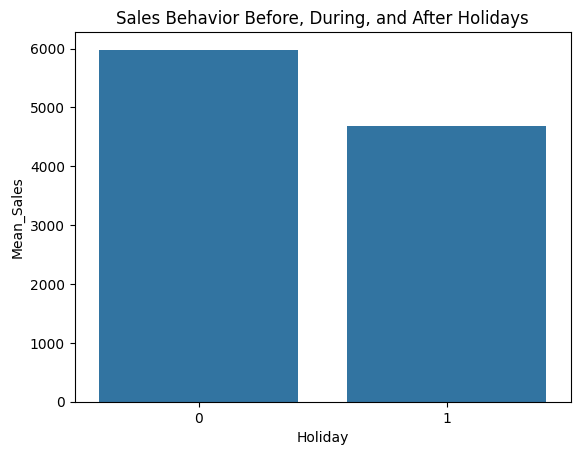

In [12]:
holiday_sales = merged_data.groupby('Holiday').agg({'Sales': ['mean', 'std']}).reset_index()
holiday_sales.columns = ['Holiday', 'Mean_Sales', 'Std_Sales']
sns.barplot(x='Holiday', y='Mean_Sales', data=holiday_sales)
plt.title('Sales Behavior Before, During, and After Holidays')
plt.show()

#### Seasonal Purchase Behaviors (e.g., Christmas, Easter)

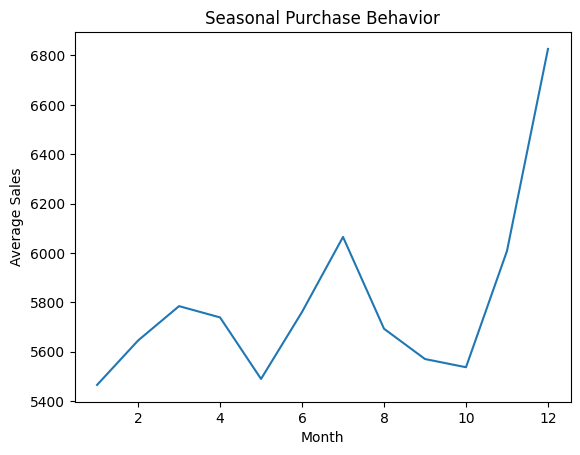

In [13]:
merged_data['Month'] = merged_data['Date'].dt.month
monthly_sales = merged_data.groupby('Month').agg({'Sales': 'mean'}).reset_index()
sns.lineplot(x='Month', y='Sales', data=monthly_sales)
plt.title('Seasonal Purchase Behavior')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()

#### Correlation Between Sales and Number of Customers

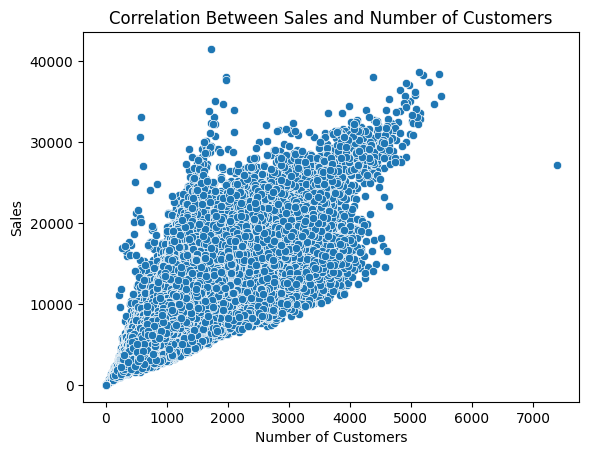

In [14]:
sns.scatterplot(x='Customers', y='Sales', data=merged_data)
plt.title('Correlation Between Sales and Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()


#### Effect of Promo on Sales

2025-01-03 22:27:07,451 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 22:27:07,460 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


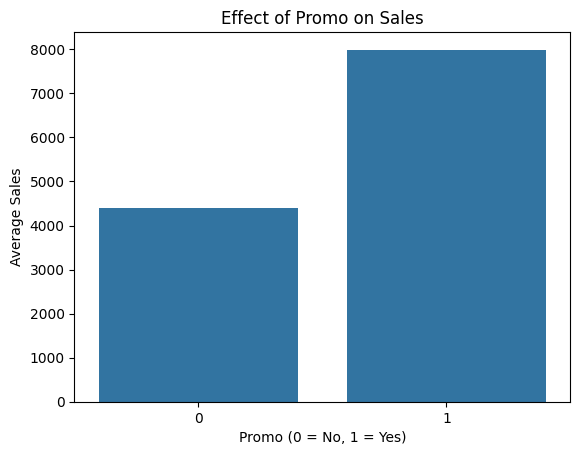

In [15]:
promo_sales = merged_data.groupby('Promo').agg({'Sales': 'mean'}).reset_index()
sns.barplot(x='Promo', y='Sales', data=promo_sales)
plt.title('Effect of Promo on Sales')
plt.xlabel('Promo (0 = No, 1 = Yes)')
plt.ylabel('Average Sales')
plt.show()

#### Promo and Customer Interaction (Are promos attracting more customers?)

2025-01-03 22:27:21,027 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 22:27:21,038 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


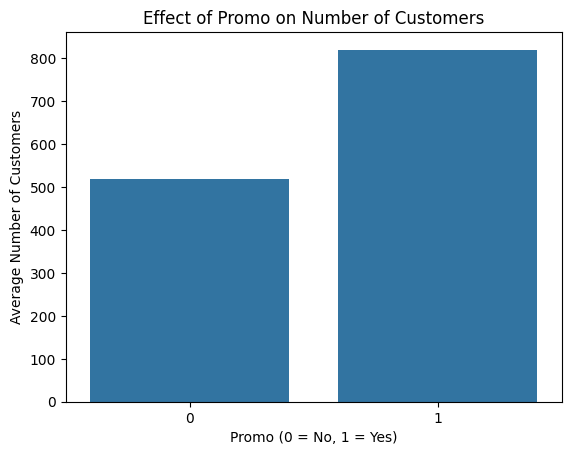

In [16]:
promo_customers = merged_data.groupby('Promo').agg({'Customers': 'mean'}).reset_index()
sns.barplot(x='Promo', y='Customers', data=promo_customers)
plt.title('Effect of Promo on Number of Customers')
plt.xlabel('Promo (0 = No, 1 = Yes)')
plt.ylabel('Average Number of Customers')
plt.show()

#### Trends of Customer Behavior During Store Opening and Closing Times

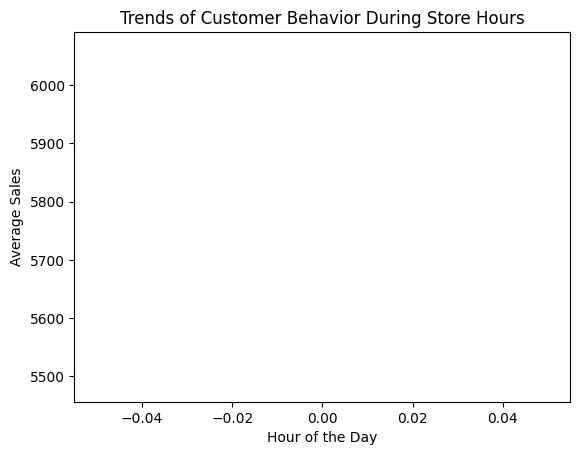

In [17]:
merged_data['Hour'] = merged_data['Date'].dt.hour
store_opening = merged_data.groupby('Hour').agg({'Sales': 'mean'}).reset_index()
sns.lineplot(x='Hour', y='Sales', data=store_opening)
plt.title('Trends of Customer Behavior During Store Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Sales')
plt.show()

#### Assortment Type vs Sales

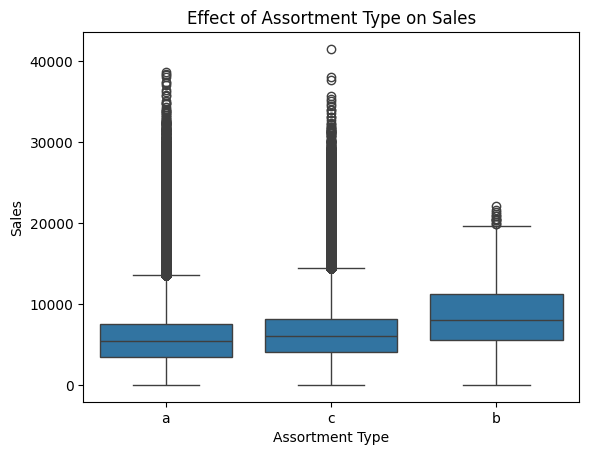

In [18]:
sns.boxplot(x='Assortment', y='Sales', data=merged_data)
plt.title('Effect of Assortment Type on Sales')
plt.xlabel('Assortment Type')
plt.ylabel('Sales')
plt.show()

#### Competition Distance vs Sales

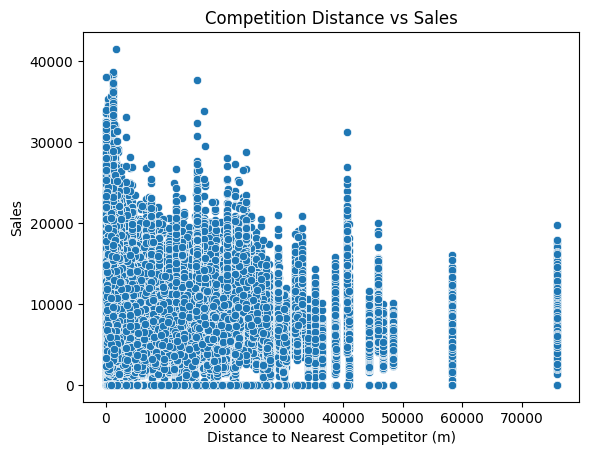

In [20]:
sns.scatterplot(x='CompetitionDistance', y='Sales', data=merged_data)
plt.title('Competition Distance vs Sales')
plt.xlabel('Distance to Nearest Competitor (m)')
plt.ylabel('Sales')
plt.show()

#### Impact of Opening/Reopening of Competitors on Sales

In [21]:
merged_data['CompetitionOpenSinceYear'] = merged_data['CompetitionOpenSinceYear'].fillna(0)
merged_data['CompetitionOpenSinceYear'] = merged_data['CompetitionOpenSinceYear'].astype(int)


#### Investigate sales during competitor opening times

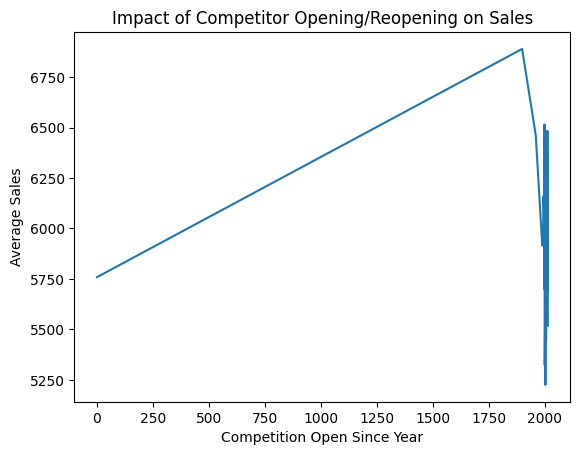

In [22]:
competitor_open_sales = merged_data.groupby('CompetitionOpenSinceYear').agg({'Sales': 'mean'}).reset_index()
sns.lineplot(x='CompetitionOpenSinceYear', y='Sales', data=competitor_open_sales)
plt.title('Impact of Competitor Opening/Reopening on Sales')
plt.xlabel('Competition Open Since Year')
plt.ylabel('Average Sales')
plt.show()

#### Stores Open on All Weekdays vs Sales on Weekends

2025-01-03 22:29:01,232 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 22:29:01,239 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


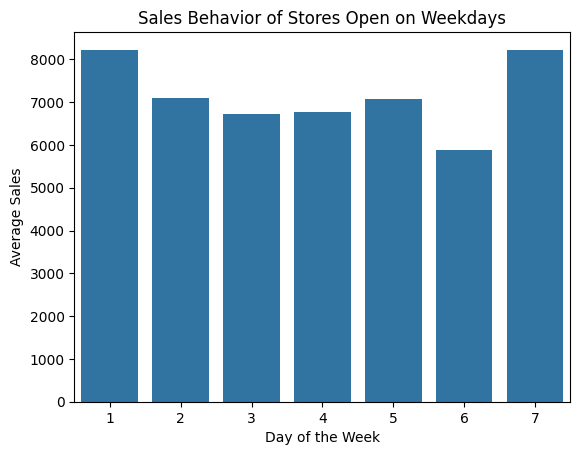

In [23]:
weekday_open_stores = merged_data[merged_data['Open'] == 1]
weekday_sales = weekday_open_stores.groupby('DayOfWeek').agg({'Sales': 'mean'}).reset_index()

sns.barplot(x='DayOfWeek', y='Sales', data=weekday_sales)
plt.title('Sales Behavior of Stores Open on Weekdays')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.show()

#### Saving the cleaned data and plots to files

In [24]:
merged_data.to_csv('../data/cleaned_data.csv', index=False)

#### Save the plots

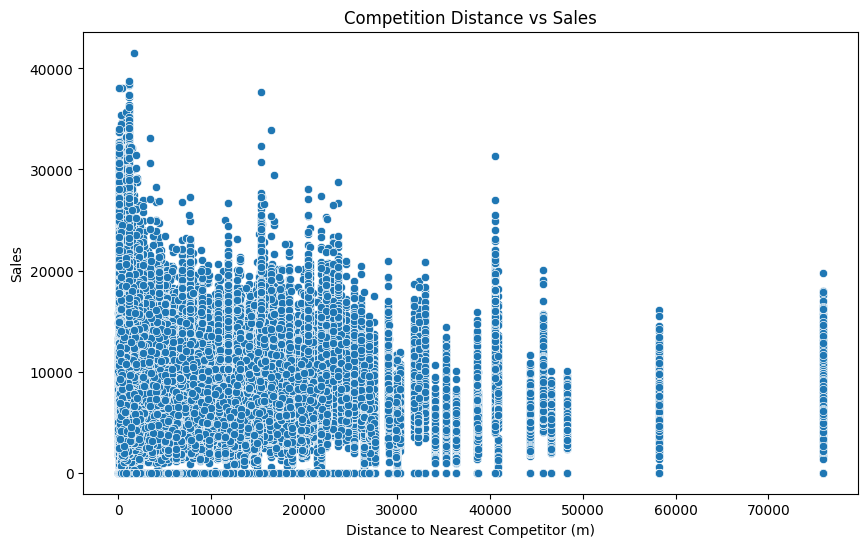

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=merged_data)
plt.title('Competition Distance vs Sales')
plt.xlabel('Distance to Nearest Competitor (m)')
plt.ylabel('Sales')
plt.savefig('competition_distance_vs_sales.png')
